<a href="https://colab.research.google.com/github/d4u0ul/projects/blob/master/ESTUDO_MOSAICO_BASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CD8 - Programming

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [12]:
# Lendo as planilhas
inicio = dt.datetime.now()
path= r'/content/drive/My Drive/Colab Notebooks'
mosaico_base = pd.read_excel(path + '/MOSAICO_BASE.xlsx')
ibge = pd.read_excel(path + '/Tabela_IBGE_Municipios.xlsx',header=1)
acesso = pd.read_csv(path + '/Acessos_Telefonia_Movel_2020.csv',sep=';')
final = dt.datetime.now()
print(f'Tempo gasto para ler as planilhas {final - inicio}')

Tempo gasto para ler as planilhas 0:01:32.421248


# Setando as configurações dos df's

In [59]:
mosaico_base.query('EnderecoEstacao == "NULL"').head()

,NomeEntidade,NumFistel,NumEstacao,EnderecoEstacao,SiglaUf,CodMunicipio,DesignacaoEmissao,FreqInicialMHz,FreqFinalMHz,Banda,Tecnologia,DataPrimeiroLicenciamento,NumServico,Município,Latitude,Longitude,País,RanSharing


In [7]:

# Corrigindo o nome das operadoras
mosaico_base.replace(to_replace=['TELEFONICA BRASIL S.A.','TIM S/A '],value=['TELEFÔNICA BRASIL S.A.','TIM S/A'],inplace=True)
# Retirando as células sem valores na coluna município
mosaico_base.dropna(subset=['Município'],inplace=True)
#Setando configurações da visualização dos valores nos df's
pd.options.display.float_format = '{:.2f}'.format

# Visualizando as planilhas

In [ ]:
mosaico_base.head()

,NomeEntidade,NumFistel,NumEstacao,EnderecoEstacao,SiglaUf,CodMunicipio,DesignacaoEmissao,FreqInicialMHz,FreqFinalMHz,Banda,Tecnologia,DataPrimeiroLicenciamento,NumServico,Município,Latitude,Longitude,País,RanSharing
0,TELEFÔNICA BRASIL S.A.,50409146366,64300,"RUA FLORIANO PEIXOTO, 358, AEROPORTO VELHO",AC,1200401,5M00G9W,2155.00,2165.00,2100,3G,2000-11-27 00:00:00,10.00,Rio Branco,09S581929,67W484880,Brasil,Não
1,TELEFÔNICA BRASIL S.A.,50409146366,64300,"RUA FLORIANO PEIXOTO, 358, AEROPORTO VELHO",AC,1200401,5M00G9W,869.00,880.00,850,3G,2000-11-27 00:00:00,10.00,Rio Branco,09S581929,67W484880,Brasil,Não
2,TELEFÔNICA BRASIL S.A.,50409146366,64300,"RUA FLORIANO PEIXOTO, 358, AEROPORTO VELHO",AC,1200401,200KG7W,890.00,891.50,850,2G,2000-11-27 00:00:00,10.00,Rio Branco,09S581929,67W484880,Brasil,Não
3,TELEFÔNICA BRASIL S.A.,50409146366,64300,"RUA FLORIANO PEIXOTO, 358, AEROPORTO VELHO",AC,1200401,5M00G9W,890.00,891.50,850,3G,2000-11-27 00:00:00,10.00,Rio Branco,09S581929,67W484880,Brasil,Não
4,TELEFÔNICA BRASIL S.A.,50409146366,64300,"RUA FLORIANO PEIXOTO, 358, AEROPORTO VELHO",AC,1200401,200KG7W,1850.00,1860.00,1800,2G,2000-11-27 00:00:00,10.00,Rio Branco,09S581929,67W484880,Brasil,Não


In [ ]:
ibge.head()

,UF,COD. UF,COD. MUNIC,Cod_IBGE,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA
0,RO,11,15,1100015,Alta Floresta D'Oeste,22945
1,RO,11,23,1100023,Ariquemes,107863
2,RO,11,31,1100031,Cabixi,5312
3,RO,11,49,1100049,Cacoal,85359
4,RO,11,56,1100056,Cerejeiras,16323


In [ ]:
acesso.head()

,Ano,Mês,Grupo Econômico,Empresa,CNPJ,Porte da Prestadora,UF,Município,Código IBGE Município,Código Nacional,Código Nacional (Chip),Modalidade de Cobrança,Tecnologia,Tecnologia Geração,Tipo de Pessoa,Tipo de Produto,Acessos
0,2020,4,OI,OI,5423963000111,Grande Porte,SP,Itararé,3523206,15,91,Pós-pago,GSM,2G,Pessoa Jurídica,M2M_ESPECIAL,1
1,2020,4,OI,OI,5423963000111,Grande Porte,PI,Altos,2200400,86,83,Pós-pago,GSM,2G,Pessoa Jurídica,M2M_ESPECIAL,1
2,2020,4,OI,OI,5423963000111,Grande Porte,MG,Teófilo Otoni,3168606,33,11,Pós-pago,GSM,2G,Pessoa Jurídica,M2M_ESPECIAL,20
3,2020,4,OI,OI,5423963000111,Grande Porte,SP,São Roque,3550605,11,19,Pós-pago,GSM,2G,Pessoa Jurídica,M2M_ESPECIAL,2
4,2020,4,OI,OI,5423963000111,Grande Porte,CE,Itaitinga,2306256,85,11,Pós-pago,GSM,2G,Pessoa Jurídica,M2M_ESPECIAL,19


# Tratando a informação da UF na planilha mosaico_base

In [ ]:
# Extraindo a informação de UF da planilha de ibge
ibge_uf = ibge[['Cod_IBGE','UF']].copy()
ibge_uf.rename(columns={'Cod_IBGE':'CodMunicipio'},inplace=True)
# Adicionando a coluna de UF correspondente
mosaico_base = pd.merge(mosaico_base,ibge_uf,how='left',on='CodMunicipio')
mosaico_base.drop(columns=['SiglaUf'],inplace=True)
mosaico_base.rename(columns={'UF':'SiglaUf'},inplace=True)

In [ ]:
mosaico_base.head()

,NomeEntidade,NumFistel,NumEstacao,EnderecoEstacao,CodMunicipio,DesignacaoEmissao,FreqInicialMHz,FreqFinalMHz,Banda,Tecnologia,DataPrimeiroLicenciamento,NumServico,Município,Latitude,Longitude,País,RanSharing,SiglaUf
0,TELEFÔNICA BRASIL S.A.,50409146366,64300,"RUA FLORIANO PEIXOTO, 358, AEROPORTO VELHO",1200401,5M00G9W,2155.00,2165.00,2100,3G,2000-11-27 00:00:00,10.00,Rio Branco,09S581929,67W484880,Brasil,Não,AC
1,TELEFÔNICA BRASIL S.A.,50409146366,64300,"RUA FLORIANO PEIXOTO, 358, AEROPORTO VELHO",1200401,5M00G9W,869.00,880.00,850,3G,2000-11-27 00:00:00,10.00,Rio Branco,09S581929,67W484880,Brasil,Não,AC
2,TELEFÔNICA BRASIL S.A.,50409146366,64300,"RUA FLORIANO PEIXOTO, 358, AEROPORTO VELHO",1200401,200KG7W,890.00,891.50,850,2G,2000-11-27 00:00:00,10.00,Rio Branco,09S581929,67W484880,Brasil,Não,AC
3,TELEFÔNICA BRASIL S.A.,50409146366,64300,"RUA FLORIANO PEIXOTO, 358, AEROPORTO VELHO",1200401,5M00G9W,890.00,891.50,850,3G,2000-11-27 00:00:00,10.00,Rio Branco,09S581929,67W484880,Brasil,Não,AC
4,TELEFÔNICA BRASIL S.A.,50409146366,64300,"RUA FLORIANO PEIXOTO, 358, AEROPORTO VELHO",1200401,200KG7W,1850.00,1860.00,1800,2G,2000-11-27 00:00:00,10.00,Rio Branco,09S581929,67W484880,Brasil,Não,AC


# Trabalhando com a planilha de Acesso 2020

In [ ]:
# Geração do total de acessos de operadora por município
acesso_tot = pd.pivot_table(acesso,index =['Empresa','UF','Município','Código IBGE Município'],values='Acessos',aggfunc=np.sum)
acesso_tot.reset_index(inplace=True)
acesso_tot

,Empresa,UF,Município,Código IBGE Município,Acessos
0,ALGAR (CTBC TELECOM),GO,Buriti Alegre,5203906,6743
1,ALGAR (CTBC TELECOM),GO,Cachoeira Dourada,5204250,17275
2,ALGAR (CTBC TELECOM),GO,Goiatuba,5209101,8
3,ALGAR (CTBC TELECOM),GO,Inaciolândia,5209937,10543
4,ALGAR (CTBC TELECOM),GO,Itajá,5210802,4
...,...,...,...,...,...
26157,VIVO,TO,Tocantínia,1721109,2296
26158,VIVO,TO,Tupirama,1721257,580
26159,VIVO,TO,Tupiratins,1721307,775
26160,VIVO,TO,Wanderlândia,1722081,1742


In [ ]:
# Agregando e somando os valores de acesso com as colunas por operadora
acessos_ope_mun = acesso_tot.pivot_table(values='Acessos',index=['Código IBGE Município','Município','UF'],columns='Empresa').reset_index()
acessos_ope_mun.fillna(0,inplace=True)
acessos_ope_mun['Acessos_Total'] = acessos_ope_mun.iloc[:,1:].sum(axis=1)
acessos_ope_mun

Empresa,Código IBGE Município,Município,UF,ALGAR (CTBC TELECOM),AMERICA NET LTDA,CLARO,DATORA,J. SAFRA TELECOMUNICACOES LTDA,LIGUE TELECOMUNICAÇÕES LTDA,NEXTEL,OI,PREFEITURA DE LONDRINA/COPEL,SURF TELECOM SA,TIM,VIVO,Acessos_Total
0,1100015,Alta Floresta D'Oeste,RO,0.00,0.00,2728.00,0.00,0.00,0.00,0.00,6854.00,0.00,0.00,227.00,21988.00,31797.00
1,1100023,Ariquemes,RO,0.00,0.00,187047.00,0.00,0.00,0.00,31.00,58056.00,0.00,249.00,30037.00,91616.00,367036.00
2,1100031,Cabixi,RO,0.00,0.00,5685.00,0.00,0.00,0.00,0.00,1465.00,0.00,0.00,8658.00,516.00,16324.00
3,1100049,Cacoal,RO,0.00,0.00,145844.00,0.00,0.00,0.00,9.00,47602.00,0.00,1959.00,22309.00,83860.00,301583.00
4,1100056,Cerejeiras,RO,0.00,0.00,31873.00,0.00,0.00,0.00,5.00,14200.00,0.00,0.00,5518.00,6450.00,58046.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,GO,0.00,0.00,8047.00,0.00,0.00,0.00,2.00,1374.00,0.00,0.00,2380.00,10774.00,22577.00
5566,5222054,Vicentinópolis,GO,0.00,0.00,7683.00,0.00,0.00,0.00,4.00,1517.00,0.00,0.00,723.00,17232.00,27159.00
5567,5222203,Vila Boa,GO,0.00,0.00,142.00,0.00,0.00,0.00,0.00,186.00,0.00,0.00,349.00,720.00,1397.00
5568,5222302,Vila Propício,GO,0.00,0.00,120.00,0.00,0.00,0.00,0.00,604.00,0.00,0.00,321.00,5064.00,6109.00


In [ ]:
# Adição das colunas de MKTS na planilha de acesso_ope_mun
acessos_ope_mun["TIM_MKTS"] = acessos_ope_mun['TIM']/acessos_ope_mun["Acessos_Total"]*100
acessos_ope_mun["VIVO_MKTS"] = acessos_ope_mun["VIVO"]/acessos_ope_mun["Acessos_Total"]*100
acessos_ope_mun["CLARO_MKTS"] = acessos_ope_mun["CLARO"]/acessos_ope_mun["Acessos_Total"]*100
acessos_ope_mun["OI_MKTS"] = acessos_ope_mun["OI"]/acessos_ope_mun["Acessos_Total"]*100
acessos_ope_mun["OUTRAS_MKTS"]= 100-(acessos_ope_mun["TIM_MKTS"]+acessos_ope_mun["VIVO_MKTS"]+acessos_ope_mun["CLARO_MKTS"]+acessos_ope_mun["OI_MKTS"])
acessos_ope_mun.rename(columns={'Código IBGE Município': 'CodMunicipio'},inplace=True)
acessos_ope_mun.head()

Empresa,CodMunicipio,Município,UF,ALGAR (CTBC TELECOM),AMERICA NET LTDA,CLARO,DATORA,J. SAFRA TELECOMUNICACOES LTDA,LIGUE TELECOMUNICAÇÕES LTDA,NEXTEL,OI,PREFEITURA DE LONDRINA/COPEL,SURF TELECOM SA,TIM,VIVO,Acessos_Total,TIM_MKTS,VIVO_MKTS,CLARO_MKTS,OI_MKTS,OUTRAS_MKTS
0,1100015,Alta Floresta D'Oeste,RO,0.00,0.00,2728.00,0.00,0.00,0.00,0.00,6854.00,0.00,0.00,227.00,21988.00,31797.00,0.71,69.15,8.58,21.56,0.00
1,1100023,Ariquemes,RO,0.00,0.00,187047.00,0.00,0.00,0.00,31.00,58056.00,0.00,249.00,30037.00,91616.00,367036.00,8.18,24.96,50.96,15.82,0.08
2,1100031,Cabixi,RO,0.00,0.00,5685.00,0.00,0.00,0.00,0.00,1465.00,0.00,0.00,8658.00,516.00,16324.00,53.04,3.16,34.83,8.97,0.00
3,1100049,Cacoal,RO,0.00,0.00,145844.00,0.00,0.00,0.00,9.00,47602.00,0.00,1959.00,22309.00,83860.00,301583.00,7.40,27.81,48.36,15.78,0.65
4,1100056,Cerejeiras,RO,0.00,0.00,31873.00,0.00,0.00,0.00,5.00,14200.00,0.00,0.00,5518.00,6450.00,58046.00,9.51,11.11,54.91,24.46,0.01


# Observações

### Existe uma diferença encontrada no número de erbs, densidade , ranking e etc devido a quantidade de vezes que a erb está aparecendo no dataframe 
### Uma erb aparece mais de uma vez no município devido a sua capacidade, banda e tecnologia associada
### Assim, quando agrupamos e descobrimos a quantidade de erbs por município através da função 'count' no dataframe com duplicidade, obtemos o número de vezes que a mesma aparece de acordo com sua capacidade, banda e tecnologia
### Quando agrupamos o dataframe sem duplicidade de erbs, temos um valor "único" que representa apenas a quantidade daquela erb no município por operadora
### Então foram criadas duas visões a partir da planilha MOSAICO_BASE. Em sua primeira visão temos a presença da duplicidade das erbs e em sua segunda visão não temos esta duplicidade
### O que está diferenciando os dois dataframes é a capacidade. Ela é a chave que faz com que a erb apareça mais de uma vez por município

# Trabalhando com a planilha mosaico_base


In [ ]:
# Slice da mosaico_base
mosaico = mosaico_base[['NomeEntidade','NumEstacao','SiglaUf','Município','CodMunicipio','FreqInicialMHz','FreqFinalMHz','Banda','Tecnologia']].copy()
mosaico.rename(columns={'NomeEntidade':'Operadora','NumEstacao':'ERB','SiglaUf':'UF'},inplace=True)
mosaico.head()

,Operadora,ERB,UF,Município,CodMunicipio,FreqInicialMHz,FreqFinalMHz,Banda,Tecnologia
0,TELEFÔNICA BRASIL S.A.,64300,AC,Rio Branco,1200401,2155.00,2165.00,2100,3G
1,TELEFÔNICA BRASIL S.A.,64300,AC,Rio Branco,1200401,869.00,880.00,850,3G
2,TELEFÔNICA BRASIL S.A.,64300,AC,Rio Branco,1200401,890.00,891.50,850,2G
3,TELEFÔNICA BRASIL S.A.,64300,AC,Rio Branco,1200401,890.00,891.50,850,3G
4,TELEFÔNICA BRASIL S.A.,64300,AC,Rio Branco,1200401,1850.00,1860.00,1800,2G


In [ ]:
# Renomeando o nome das operadoras
mosaico.replace(to_replace=['CLARO S.A.','OI MÓVEL S.A.','TELEFÔNICA BRASIL S.A.','TIM S/A'],value=['CLARO','OI','VIVO','TIM'],inplace=True)
# Calculando a capacidade
mosaico['Capacidade'] = mosaico['FreqFinalMHz'] - mosaico['FreqInicialMHz']

In [ ]:
mosaico.head()

,Operadora,ERB,UF,Município,CodMunicipio,FreqInicialMHz,FreqFinalMHz,Banda,Tecnologia,Capacidade
0,VIVO,64300,AC,Rio Branco,1200401,2155.00,2165.00,2100,3G,10.00
1,VIVO,64300,AC,Rio Branco,1200401,869.00,880.00,850,3G,11.00
2,VIVO,64300,AC,Rio Branco,1200401,890.00,891.50,850,2G,1.50
3,VIVO,64300,AC,Rio Branco,1200401,890.00,891.50,850,3G,1.50
4,VIVO,64300,AC,Rio Branco,1200401,1850.00,1860.00,1800,2G,10.00


In [ ]:
# Classificando a banda por tecnologia
mosaico['Banda'] = mosaico['Banda'].astype('str')
mosaico.replace('1900','1800',inplace=True)
condition_list =[mosaico['Tecnologia'] == '2G',mosaico['Tecnologia'] == '3G',mosaico['Tecnologia'] == '4G']
choice_list =[(mosaico['Banda'] + '_2G'),(mosaico['Banda'] + '_3G'),(mosaico['Banda'] + '_4G')]
mosaico['BANDA_TEC'] = np.select(condition_list,choice_list)
mosaico.head()

,Operadora,ERB,UF,Município,CodMunicipio,FreqInicialMHz,FreqFinalMHz,Banda,Tecnologia,Capacidade,BANDA_TEC
0,VIVO,64300,AC,Rio Branco,1200401,2155.00,2165.00,2100,3G,10.00,2100_3G
1,VIVO,64300,AC,Rio Branco,1200401,869.00,880.00,850,3G,11.00,850_3G
2,VIVO,64300,AC,Rio Branco,1200401,890.00,891.50,850,2G,1.50,850_2G
3,VIVO,64300,AC,Rio Branco,1200401,890.00,891.50,850,3G,1.50,850_3G
4,VIVO,64300,AC,Rio Branco,1200401,1850.00,1860.00,1800,2G,10.00,1800_2G


# Visão com duplicidade

### Item 4

#### SOMAR A QUANTIDADE DE FREQUÊNCIAS LICENCIADAS POR MUNICÍPIO POR CADA OPERADORA

In [ ]:
# Agrupando as frequências de acordo com suas tecnologias
mosaico_freq = pd.pivot_table(mosaico,index=['Operadora','ERB','Município','UF','Capacidade'],values='Banda',columns='BANDA_TEC',aggfunc='count')
mosaico_freq.reset_index(inplace=True)
mosaico_freq.fillna(0,inplace=True)
# Adicionando a quantidade total de banda por capacidade
mosaico_freq['TOTAL_FREQ'] = mosaico_freq.iloc[:,5:].sum(axis=1)
mosaico_freq.head()

BANDA_TEC,Operadora,ERB,Município,UF,Capacidade,1800_2G,1800_3G,1800_4G,2100_3G,2100_4G,2600_4G,450_4G,700_4G,850_2G,850_3G,850_4G,900_2G,900_3G,TOTAL_FREQ
0,ALGAR TELECOM S/A,945005,São Joaquim da Barra,SP,4.60,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,ALGAR TELECOM S/A,945005,São Joaquim da Barra,SP,4.80,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,ALGAR TELECOM S/A,945005,São Joaquim da Barra,SP,5.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,4.00
3,ALGAR TELECOM S/A,945641,Ituverava,SP,10.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
4,ALGAR TELECOM S/A,946222,Orlândia,SP,4.60,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [ ]:
#Visualizando um município
mosaico_freq.loc[mosaico_freq['Município'] == "Alta Floresta D'Oeste"].head()

BANDA_TEC,Operadora,ERB,Município,UF,Capacidade,1800_2G,1800_3G,1800_4G,2100_3G,2100_4G,2600_4G,450_4G,700_4G,850_2G,850_3G,850_4G,900_2G,900_3G,TOTAL_FREQ
19730,CLARO,685054110,Alta Floresta D'Oeste,RO,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,2.00
19731,CLARO,685054110,Alta Floresta D'Oeste,RO,5.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
19732,CLARO,685054110,Alta Floresta D'Oeste,RO,10.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,4.00
43334,CLARO,696172968,Alta Floresta D'Oeste,RO,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
43335,CLARO,696172968,Alta Floresta D'Oeste,RO,5.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00


### Item 3 

#### SOMAR A QUANTIDADE DE ERB POR MUNICÍPIO POR CADA OPERADORA 
#### ADIÇÃO DAS COLUNAS POSIÇÃO E PORCENTAGEM

In [ ]:
# Descobrindo a quantidade de erbs
mosaico_fre = mosaico_freq.loc[(mosaico_freq['Operadora'] == "TIM") | (mosaico_freq['Operadora'] == "OI") | (mosaico_freq['Operadora'] == "CLARO") | (mosaico_freq['Operadora'] == "VIVO")]
erb_num = pd.pivot_table(mosaico_fre,index=['Operadora','Município','UF'],values='ERB',aggfunc='count').reset_index()
erb_num.head()

BANDA_TEC,Operadora,Município,UF,ERB
0,CLARO,Abadia de Goiás,GO,6
1,CLARO,Abadiânia,GO,17
2,CLARO,Abaetetuba,PA,12
3,CLARO,Abaeté,MG,3
4,CLARO,Abaré,BA,2


In [ ]:
# Visualizando a quantidade de erbs em um município
erb_num.loc[erb_num['Município'] == "Alta Floresta D'Oeste"]

BANDA_TEC,Operadora,Município,UF,ERB
79,CLARO,Alta Floresta D'Oeste,RO,9
4314,OI,Alta Floresta D'Oeste,RO,1
7934,TIM,Alta Floresta D'Oeste,RO,2
11780,VIVO,Alta Floresta D'Oeste,RO,4


In [ ]:
# Acrescentando a coluna da Posição
erb_num['POSIÇÃO']= erb_num.groupby('Município').ERB.rank(method='dense',ascending=False)
erb_num.loc[erb_num['Município'] == "Alta Floresta D'Oeste"]

BANDA_TEC,Operadora,Município,UF,ERB,POSIÇÃO
79,CLARO,Alta Floresta D'Oeste,RO,9,1.00
4314,OI,Alta Floresta D'Oeste,RO,1,4.00
7934,TIM,Alta Floresta D'Oeste,RO,2,3.00
11780,VIVO,Alta Floresta D'Oeste,RO,4,2.00


In [ ]:
# Passando os valores das posições como valores das operadoras
erb_posicao = pd.pivot_table(erb_num,'POSIÇÃO',['Município','UF'],'Operadora')
erb_posicao.fillna(0,inplace=True)
erb_posicao.rename(columns={'CLARO':'CLARO_POS','OI':'OI_POS','TIM':'TIM_POS','VIVO':'VIVO_POS'},inplace=True)
erb_posicao.reset_index(inplace=True)
erb_posicao.head()

Operadora,Município,UF,CLARO_POS,OI_POS,TIM_POS,VIVO_POS
0,Abadia de Goiás,GO,1.00,4.00,2.00,3.00
1,Abadia dos Dourados,MG,0.00,1.00,0.00,2.00
2,Abadiânia,GO,1.00,3.00,2.00,4.00
3,Abaetetuba,PA,4.00,2.00,1.00,3.00
4,Abaeté,MG,2.00,3.00,2.00,1.00


In [ ]:
# Passando as operadoras para colunas e as posições como valores e acrescentando a porcentagem
erb_opr = erb_num.pivot_table(values='ERB',index=['Município','UF'],columns='Operadora',aggfunc=np.sum).reset_index()
erb_opr.fillna(0,inplace=True)
erb_opr['TOTAL_ERBS'] = erb_opr.iloc[:,2:].sum(axis=1)
erb_opr['TIM_PCT'] = round((erb_opr.loc[:,'TIM'] / erb_opr.loc[:,'TOTAL_ERBS']) * 100)
erb_opr['OI_PCT'] = round((erb_opr.loc[:,'OI'] / erb_opr.loc[:,'TOTAL_ERBS']) * 100)
erb_opr['VIVO_PCT'] =  round((erb_opr.loc[:,'VIVO'] / erb_opr.loc[:,'TOTAL_ERBS']) * 100)
erb_opr['CLARO_PCT'] = round((erb_opr.loc[:,'CLARO'] / erb_opr.loc[:,'TOTAL_ERBS']) * 100)
erb_opr.rename(columns={'CLARO':'CLARO_ERB','OI':'OI_ERB','TIM':'TIM_ERB','VIVO':'VIVO_ERB'},inplace=True)
erb_opr.head()

Operadora,Município,UF,CLARO_ERB,OI_ERB,TIM_ERB,VIVO_ERB,TOTAL_ERBS,TIM_PCT,OI_PCT,VIVO_PCT,CLARO_PCT
0,Abadia de Goiás,GO,6.00,2.00,4.00,3.00,15.00,27.00,13.00,20.00,40.00
1,Abadia dos Dourados,MG,0.00,3.00,0.00,2.00,5.00,0.00,60.00,40.00,0.00
2,Abadiânia,GO,17.00,6.00,10.00,4.00,37.00,27.00,16.00,11.00,46.00
3,Abaetetuba,PA,12.00,18.00,20.00,15.00,65.00,31.00,28.00,23.00,18.00
4,Abaeté,MG,3.00,2.00,3.00,8.00,16.00,19.00,12.00,50.00,19.00


In [ ]:
# Juntando os dataframes anteriores
erb_visu = pd.merge(erb_posicao,erb_opr,how='right')
erb_visu.head()

Operadora,Município,UF,CLARO_POS,OI_POS,TIM_POS,VIVO_POS,CLARO_ERB,OI_ERB,TIM_ERB,VIVO_ERB,TOTAL_ERBS,TIM_PCT,OI_PCT,VIVO_PCT,CLARO_PCT
0,Abadia de Goiás,GO,1.00,4.00,2.00,3.00,6.00,2.00,4.00,3.00,15.00,27.00,13.00,20.00,40.00
1,Abadia dos Dourados,MG,0.00,1.00,0.00,2.00,0.00,3.00,0.00,2.00,5.00,0.00,60.00,40.00,0.00
2,Abadiânia,GO,1.00,3.00,2.00,4.00,17.00,6.00,10.00,4.00,37.00,27.00,16.00,11.00,46.00
3,Abaetetuba,PA,4.00,2.00,1.00,3.00,12.00,18.00,20.00,15.00,65.00,31.00,28.00,23.00,18.00
4,Abaeté,MG,2.00,3.00,2.00,1.00,3.00,2.00,3.00,8.00,16.00,19.00,12.00,50.00,19.00


## Item 7

#### ADIÇÃO DA COLUNA GAP TIM  (ERB POR MUNICÍPIO)

In [ ]:
# Selecionando dentro do dataframe erb_vis os valores aos quais a TIM não está em primeira posição
cal_d = erb_visu.loc[erb_visu['TIM_POS'] != 1]
# Selecionando o maior valor referente as demais operadoras, ou seja , a primeira posição em relação a ERB
max_erb1 = [cal_d.iloc[c,[6,7,9]].max() for c in range(0,len(cal_d))]
# Selecionando os valores da coluna TIM
num_tim1 = [cal_d.iloc[c,8] for c in range(0,len(cal_d))]
# Realizando o cálculo da diferença e adicionando a coluna no df - cal_dif
zip_object = zip(max_erb1,num_tim1)
diff = [num_tim1-max_erb1 for max_erb1, num_tim1 in zip_object]
cal_d['GAP_TIM'] = diff
# Agregando novamente a planilha geral erb_vis
erb_visu = pd.merge(erb_visu,cal_d,how='left')
erb_visu.fillna(0,inplace=True)
erb_visu.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Operadora,Município,UF,CLARO_POS,OI_POS,TIM_POS,VIVO_POS,CLARO_ERB,OI_ERB,TIM_ERB,VIVO_ERB,TOTAL_ERBS,TIM_PCT,OI_PCT,VIVO_PCT,CLARO_PCT,GAP_TIM
0,Abadia de Goiás,GO,1.00,4.00,2.00,3.00,6.00,2.00,4.00,3.00,15.00,27.00,13.00,20.00,40.00,-2.00
1,Abadia dos Dourados,MG,0.00,1.00,0.00,2.00,0.00,3.00,0.00,2.00,5.00,0.00,60.00,40.00,0.00,-3.00
2,Abadiânia,GO,1.00,3.00,2.00,4.00,17.00,6.00,10.00,4.00,37.00,27.00,16.00,11.00,46.00,-7.00
3,Abaetetuba,PA,4.00,2.00,1.00,3.00,12.00,18.00,20.00,15.00,65.00,31.00,28.00,23.00,18.00,0.00
4,Abaeté,MG,2.00,3.00,2.00,1.00,3.00,2.00,3.00,8.00,16.00,19.00,12.00,50.00,19.00,-5.00


In [ ]:
# Visualização do município com a coluna GAP TIM
erb_visu.loc[erb_visu['Município'] == "Alta Floresta D'Oeste"]

Operadora,Município,UF,CLARO_POS,OI_POS,TIM_POS,VIVO_POS,CLARO_ERB,OI_ERB,TIM_ERB,VIVO_ERB,TOTAL_ERBS,TIM_PCT,OI_PCT,VIVO_PCT,CLARO_PCT,GAP_TIM
98,Alta Floresta D'Oeste,RO,1.00,4.00,3.00,2.00,9.00,1.00,2.00,4.00,16.00,12.00,6.00,25.00,56.00,-7.00


## Item 9

#### PLOT DE UM ÚNICO MUNICÍPIO PARA COMPARAR A DENSIDADE DE ERB POR OPERADORA 

In [ ]:
# Passo a obter as colunas de operadora por erb's, onde me retorna o total de erb's da operadora por município
erb_oper = erb_num.pivot_table(values='ERB',index=['Município','UF'],columns='Operadora',aggfunc=np.sum).reset_index()
erb_oper = erb_oper.fillna(0)
erb_oper.head()

Operadora,Município,UF,CLARO,OI,TIM,VIVO
0,Abadia de Goiás,GO,6.00,2.00,4.00,3.00
1,Abadia dos Dourados,MG,0.00,3.00,0.00,2.00
2,Abadiânia,GO,17.00,6.00,10.00,4.00
3,Abaetetuba,PA,12.00,18.00,20.00,15.00
4,Abaeté,MG,3.00,2.00,3.00,8.00


In [ ]:
# Agregando as informações da ERB com os dados do IBGE e MKTS
ibge.rename(columns={'Cod_IBGE': 'CodMunicipio'}, inplace = True)
Tabel = pd.merge(erb_oper,ibge[['CodMunicipio','UF','POPULAÇÃO ESTIMADA']])
Tabel['TIM_DEN_ERB'] = Tabel['TIM'] /  Tabel['POPULAÇÃO ESTIMADA']*1000
Tabel['VIVO_DEN_ERB'] = Tabel['VIVO'] /  Tabel['POPULAÇÃO ESTIMADA']*1000
Tabel['CLARO_DEN_ERB'] = Tabel['CLARO'] /  Tabel['POPULAÇÃO ESTIMADA']*1000
Tabel['OI_DEN_ERB'] = Tabel['OI'] /  Tabel['POPULAÇÃO ESTIMADA']*1000
Tabel = pd.merge(Tabel, acessos_ope_mun [['CodMunicipio','Acessos_Total','TIM_MKTS','VIVO_MKTS','CLARO_MKTS','OI_MKTS']],how='left',on='CodMunicipio')
pd.set_option('display.max_columns',None)
Tabel.head()

,Município,UF,CLARO,OI,TIM,VIVO,CodMunicipio,POPULAÇÃO ESTIMADA,TIM_DEN_ERB,VIVO_DEN_ERB,CLARO_DEN_ERB,OI_DEN_ERB,Acessos_Total,TIM_MKTS,VIVO_MKTS,CLARO_MKTS,OI_MKTS
0,Abadia de Goiás,GO,6.00,2.00,4.00,3.00,5200050,8773,0.46,0.34,0.68,0.23,35034.00,16.62,21.04,52.43,9.91
1,Abadia de Goiás,GO,6.00,2.00,4.00,3.00,5200100,20042,0.20,0.15,0.30,0.10,32833.00,20.78,25.07,44.94,9.20
2,Abadia de Goiás,GO,6.00,2.00,4.00,3.00,5200134,22366,0.18,0.13,0.27,0.09,72414.00,12.36,67.68,14.53,5.41
3,Abadia de Goiás,GO,6.00,2.00,4.00,3.00,5200159,2516,1.59,1.19,2.38,0.79,7574.00,6.96,2.05,86.94,4.05
4,Abadia de Goiás,GO,6.00,2.00,4.00,3.00,5200175,5735,0.70,0.52,1.05,0.35,3828.00,19.36,55.85,20.85,3.94


In [ ]:
# Reformulando as colunas para gerar o gráfico
Tabel_vis = Tabel[['CodMunicipio','Município','UF','TIM_DEN_ERB','VIVO_DEN_ERB','CLARO_DEN_ERB','OI_DEN_ERB']]
Tabel_vis = pd.melt(Tabel_vis,id_vars=['Município','CodMunicipio','UF'],var_name='OPERADORA',value_name='DENSIDADE')
Tabel_vis.replace(['TIM_DEN_ERB','OI_DEN_ERB','VIVO_DEN_ERB','CLARO_DEN_ERB'],['TIM','OI','VIVO','CLARO'],inplace=True)
Tabel_vis.sort_values('DENSIDADE',ascending=False,inplace=True)
Tabel_vis.loc[Tabel_vis['Município'] == "Alta Floresta D'Oeste"]

,Município,CodMunicipio,UF,OPERADORA,DENSIDADE
6609820,Alta Floresta D'Oeste,1101468,RO,CLARO,4.15
6609821,Alta Floresta D'Oeste,1101476,RO,CLARO,3.15
6609810,Alta Floresta D'Oeste,1100908,RO,CLARO,2.95
6609796,Alta Floresta D'Oeste,1100262,RO,CLARO,2.39
6609825,Alta Floresta D'Oeste,1101559,RO,CLARO,2.09
...,...,...,...,...,...
8823546,Alta Floresta D'Oeste,1100023,RO,OI,0.01
8823556,Alta Floresta D'Oeste,1100122,RO,OI,0.01
4396027,Alta Floresta D'Oeste,1100205,RO,VIVO,0.01
2182260,Alta Floresta D'Oeste,1100205,RO,TIM,0.00


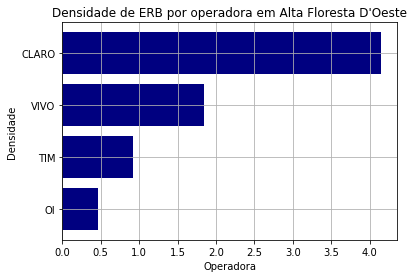

<Figure size 720x576 with 0 Axes>

In [ ]:
# Geração do Gráfico da densidade de ERB por operadora no município
%matplotlib inline
plt.rcParams.update({'font.size': 10})
mun = Tabel['Município'].unique()
for c in mun :
    if c == "Alta Floresta D'Oeste":
        teste = Tabel_vis.loc[Tabel_vis['Município'] == c]
        teste = teste.sort_values(by=['DENSIDADE'])
        ax = plt.subplot()
        ax1 = ax.barh(teste['OPERADORA'],teste['DENSIDADE'],color=['navy'])
        plt.title(f'Densidade de ERB por operadora em {c}',loc='center')
        plt.yticks(fontsize=10)
        plt.xlabel('Operadora')
        plt.ylabel('Densidade')
        plt.grid(True)
        plt.figure(figsize = (10,8))
        plt.show()

In [ ]:
# Visualização da densidade de erbs por UF
erb_ope_UF = erb_num.groupby(['UF','Operadora'])['ERB'].sum().reset_index()
erb_ope_UF = erb_ope_UF.fillna(0)
pop_UF = ibge.groupby(['UF'])['POPULAÇÃO ESTIMADA'].sum().reset_index()
erb_UF = pop_UF.merge(erb_ope_UF,left_on='UF', right_on='UF')
erb_UF['DEN_ERB_UF'] = erb_UF['ERB'] / erb_UF['POPULAÇÃO ESTIMADA']*1000
erb_UF.loc[erb_UF['UF'] == 'SP']

,UF,POPULAÇÃO ESTIMADA,Operadora,ERB,DEN_ERB_UF
100,SP,45919049,CLARO,14173,0.31
101,SP,45919049,OI,8801,0.19
102,SP,45919049,TIM,15744,0.34
103,SP,45919049,VIVO,22467,0.49


In [ ]:
# Agregando a quantidade total de erbs por uf
erb_tot = erb_UF.groupby('UF')['DEN_ERB_UF'].sum().sort_values(ascending=True)
erb_tot = erb_tot.to_frame()
erb_tot.reset_index(inplace=True)

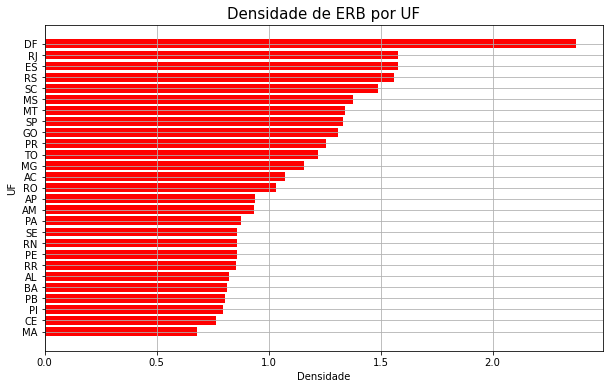

In [ ]:
#Gráfico da Densidade por ERB
x1 = erb_tot['DEN_ERB_UF']
y1 = erb_tot['UF']

plt.figure(figsize=(10,6))
plt.barh(y1,x1,align='center',color='r')
plt.title('Densidade de ERB por UF',fontsize=15,loc='center')
plt.xlabel("Densidade")
plt.ylabel('UF')
plt.grid(True)
plt.show()

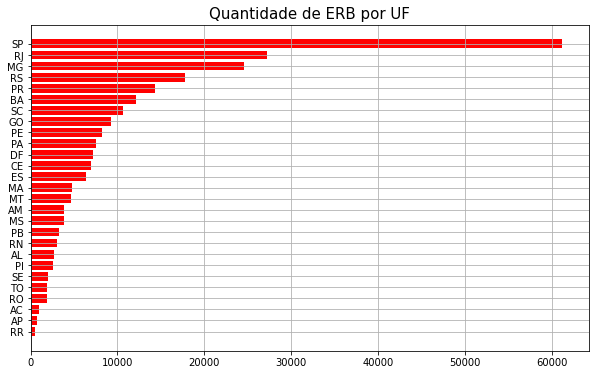

In [ ]:
# Demonstração da quantidade de erb's por UF
%matplotlib inline

#Gráfico de barras
erb_UF_qtd = erb_UF.groupby('UF')['ERB'].sum().sort_values(ascending=True)
erb_UF_qtd = erb_UF_qtd.to_frame()
erb_UF_qtd.reset_index(inplace=True)

x1 = erb_UF_qtd['ERB']
y1 = erb_UF_qtd['UF']

plt.figure(figsize = (10,6))
plt.barh(y1,x1,align='center',color='r')
plt.title('Quantidade de ERB por UF',fontsize=15,loc='center')
plt.grid(True)
plt.show()

# Visão sem duplicidade

In [ ]:
# Agrupando as frequências de acordo com suas tecnologias
mosaico_f = pd.pivot_table(mosaico,index=['Operadora','ERB','Município','CodMunicipio','UF'],values='Banda',columns='BANDA_TEC',aggfunc='count')
mosaico_f.reset_index(inplace=True)
mosaico_f.fillna(0,inplace=True)
# Adicionando a quantidade total de banda por capacidade
mosaico_f['TOTAL_FREQ'] = mosaico_f.iloc[:,4:].sum(axis=1)
mosaico_f.head()

BANDA_TEC,Operadora,ERB,Município,CodMunicipio,UF,1800_2G,1800_3G,1800_4G,2100_3G,2100_4G,2600_4G,450_4G,700_4G,850_2G,850_3G,850_4G,900_2G,900_3G,TOTAL_FREQ
0,ALGAR TELECOM S/A,945005,São Joaquim da Barra,3549409,SP,1.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,6.00
1,ALGAR TELECOM S/A,945641,Ituverava,3524105,SP,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
2,ALGAR TELECOM S/A,946222,Orlândia,3534302,SP,1.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00
3,ALGAR TELECOM S/A,946648,Orlândia,3534302,SP,1.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,6.00
4,ALGAR TELECOM S/A,946770,Jardinópolis,3525102,SP,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,7.00


In [ ]:
# Agrupando para descobrir a capacidade total por operadora
mosaico_cap = mosaico.pivot_table(index=['ERB','Município','CodMunicipio','UF','Operadora'],values='Capacidade',aggfunc=np.sum).reset_index()
mosaico_cap.rename(columns={'Capacidade':'TOTAL_CAPACIDADE'},inplace=True)

In [ ]:
# Visualizando um muncípio
mosaico_cap.loc[mosaico_cap['Município'] == "Alta Floresta D'Oeste"]

,ERB,Município,CodMunicipio,UF,Operadora,TOTAL_CAPACIDADE
6653,442752075,Alta Floresta D'Oeste,1100015,RO,VIVO,45.00
22885,684862131,Alta Floresta D'Oeste,1100015,RO,TIM,17.50
24194,685054110,Alta Floresta D'Oeste,1100015,RO,CLARO,55.00
32253,689454236,Alta Floresta D'Oeste,1100015,RO,OI,2.50
49811,696172968,Alta Floresta D'Oeste,1100015,RO,CLARO,52.50
66474,1000959098,Alta Floresta D'Oeste,1100015,RO,CLARO,37.50


### Item 4

#### SOMAR A QUANTIDADE DE FREQUÊNCIAS LICENCIADAS / CAPACIDADE POR MUNICÍPIO POR CADA OPERADORA 

In [ ]:
# Realizando a junção da planilha mosaico_f e a planilha mosaico_cap
mosaico_vis = pd.merge(mosaico_f,mosaico_cap,how='left')
mosaico_vis = mosaico_vis.loc[(mosaico_vis['Operadora'] == "TIM") | (mosaico_vis['Operadora'] == "OI") | (mosaico_vis['Operadora'] == "CLARO") | (mosaico_vis['Operadora'] == "VIVO")]
mosaico_vis.loc[mosaico_vis['Município'] == "Alta Floresta D'Oeste"]

,Operadora,ERB,Município,CodMunicipio,UF,1800_2G,1800_3G,1800_4G,2100_3G,2100_4G,2600_4G,450_4G,700_4G,850_2G,850_3G,850_4G,900_2G,900_3G,TOTAL_FREQ,TOTAL_CAPACIDADE
6236,CLARO,685054110,Alta Floresta D'Oeste,1100015,RO,2.00,0.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,0.00,8.00,55.00
13358,CLARO,696172968,Alta Floresta D'Oeste,1100015,RO,2.00,0.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,7.00,52.50
15329,CLARO,1000959098,Alta Floresta D'Oeste,1100015,RO,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,5.00,37.50
35475,OI,689454236,Alta Floresta D'Oeste,1100015,RO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,2.50
53868,TIM,684862131,Alta Floresta D'Oeste,1100015,RO,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,17.50
75216,VIVO,442752075,Alta Floresta D'Oeste,1100015,RO,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,0.00,0.00,0.00,7.00,45.00


### Item 3 

#### SOMAR A QUANTIDADE DE ERB POR MUNICÍPIO POR CADA OPERADORA 
#### ADIÇÃO DAS COLUNAS POSIÇÃO E PORCENTAGEM

In [ ]:
# Descobrindo a quantidade de erbs
erb_mun_ope = pd.pivot_table(mosaico_vis,index=['Operadora','Município','CodMunicipio','UF'],values='ERB',aggfunc='count').reset_index()
erb_mun_ope.head()

,Operadora,Município,CodMunicipio,UF,ERB
0,CLARO,Abadia de Goiás,5200050,GO,2
1,CLARO,Abadiânia,5200100,GO,5
2,CLARO,Abaetetuba,1500107,PA,4
3,CLARO,Abaeté,3100203,MG,1
4,CLARO,Abaré,2900207,BA,1


In [ ]:
# Visualizando a quantidade de erbs em um município
erb_mun_ope.loc[erb_mun_ope['Município'] == "Alta Floresta D'Oeste"]

,Operadora,Município,CodMunicipio,UF,ERB
79,CLARO,Alta Floresta D'Oeste,1100015,RO,3
4314,OI,Alta Floresta D'Oeste,1100015,RO,1
7934,TIM,Alta Floresta D'Oeste,1100015,RO,1
11780,VIVO,Alta Floresta D'Oeste,1100015,RO,1


In [ ]:
# Acrescentando a coluna da Posição
erb_mun_ope['POSIÇÃO']= erb_mun_ope.groupby('Município').ERB.rank(method='dense',ascending=False)
erb_mun_ope.loc[erb_mun_ope['Município'] == "Alta Floresta D'Oeste"]

,Operadora,Município,CodMunicipio,UF,ERB,POSIÇÃO
79,CLARO,Alta Floresta D'Oeste,1100015,RO,3,1.00
4314,OI,Alta Floresta D'Oeste,1100015,RO,1,2.00
7934,TIM,Alta Floresta D'Oeste,1100015,RO,1,2.00
11780,VIVO,Alta Floresta D'Oeste,1100015,RO,1,2.00


In [ ]:
# Passando os valores das posições como valores das operadoras
erb_pos = pd.pivot_table(erb_mun_ope,'POSIÇÃO',['Município','UF','CodMunicipio'],'Operadora')
erb_pos.fillna(0,inplace=True)
erb_pos.rename(columns={'CLARO':'CLARO_POS','OI':'OI_POS','TIM':'TIM_POS','VIVO':'VIVO_POS'},inplace=True)
erb_pos.reset_index(inplace=True)
erb_pos.head()

Operadora,Município,UF,CodMunicipio,CLARO_POS,OI_POS,TIM_POS,VIVO_POS
0,Abadia de Goiás,GO,5200050,1.00,2.00,2.00,2.00
1,Abadia dos Dourados,MG,3100104,0.00,1.00,0.00,1.00
2,Abadiânia,GO,5200100,2.00,3.00,1.00,4.00
3,Abaetetuba,PA,1500107,3.00,2.00,2.00,1.00
4,Abaeté,MG,3100203,2.00,2.00,2.00,1.00


In [ ]:
# Passando as operadoras para colunas e as posições como valores e acrescentando a porcentagem
erb_op = erb_mun_ope.pivot_table(values='ERB',index=['Município','CodMunicipio','UF'],columns='Operadora',aggfunc=np.sum).reset_index()
erb_op.fillna(0,inplace=True)
erb_op['TOTAL_ERBS'] = erb_op.iloc[:,2:].sum(axis=1)
erb_op['TIM_PCT'] = round((erb_op.loc[:,'TIM'] / erb_op.loc[:,'TOTAL_ERBS']) * 100)
erb_op['OI_PCT'] = round((erb_op.loc[:,'OI'] / erb_op.loc[:,'TOTAL_ERBS']) * 100)
erb_op['VIVO_PCT'] =  round((erb_op.loc[:,'VIVO'] / erb_op.loc[:,'TOTAL_ERBS']) * 100)
erb_op['CLARO_PCT'] = round((erb_op.loc[:,'CLARO'] / erb_op.loc[:,'TOTAL_ERBS']) * 100)
erb_op.rename(columns={'CLARO':'CLARO_ERB','OI':'OI_ERB','TIM':'TIM_ERB','VIVO':'VIVO_ERB'},inplace=True)
erb_op.head()

Operadora,Município,CodMunicipio,UF,CLARO_ERB,OI_ERB,TIM_ERB,VIVO_ERB,TOTAL_ERBS,TIM_PCT,OI_PCT,VIVO_PCT,CLARO_PCT
0,Abadia de Goiás,5200050,GO,2.00,1.00,1.00,1.00,5.00,20.00,20.00,20.00,40.00
1,Abadia dos Dourados,3100104,MG,0.00,1.00,0.00,1.00,2.00,0.00,50.00,50.00,0.00
2,Abadiânia,5200100,GO,5.00,2.00,6.00,1.00,14.00,43.00,14.00,7.00,36.00
3,Abaetetuba,1500107,PA,4.00,6.00,6.00,10.00,26.00,23.00,23.00,38.00,15.00
4,Abaeté,3100203,MG,1.00,1.00,1.00,2.00,5.00,20.00,20.00,40.00,20.00


In [ ]:
# Juntando os dataframes anteriores
erb_vis = pd.merge(erb_pos,erb_op,how='right')
erb_vis.head()

Operadora,Município,UF,CodMunicipio,CLARO_POS,OI_POS,TIM_POS,VIVO_POS,CLARO_ERB,OI_ERB,TIM_ERB,VIVO_ERB,TOTAL_ERBS,TIM_PCT,OI_PCT,VIVO_PCT,CLARO_PCT
0,Abadia de Goiás,GO,5200050,1.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,5.00,20.00,20.00,20.00,40.00
1,Abadia dos Dourados,MG,3100104,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,2.00,0.00,50.00,50.00,0.00
2,Abadiânia,GO,5200100,2.00,3.00,1.00,4.00,5.00,2.00,6.00,1.00,14.00,43.00,14.00,7.00,36.00
3,Abaetetuba,PA,1500107,3.00,2.00,2.00,1.00,4.00,6.00,6.00,10.00,26.00,23.00,23.00,38.00,15.00
4,Abaeté,MG,3100203,2.00,2.00,2.00,1.00,1.00,1.00,1.00,2.00,5.00,20.00,20.00,40.00,20.00


## Item 7

#### ADIÇÃO DA COLUNA GAP TIM  (ERB POR MUNICÍPIO)

In [ ]:
erb_vis['GAP_TIM'] = erb_vis.iloc[:,6:10].max(axis=1) - erb_vis['TIM_ERB']

In [ ]:
# Visualização do município com a coluna GAP TIM
erb_vis.loc[erb_vis['Município'] == "Alta Floresta D'Oeste"]

Operadora,Município,UF,CodMunicipio,CLARO_POS,OI_POS,TIM_POS,VIVO_POS,CLARO_ERB,OI_ERB,TIM_ERB,VIVO_ERB,TOTAL_ERBS,TIM_PCT,OI_PCT,VIVO_PCT,CLARO_PCT,GAP_TIM
98,Alta Floresta D'Oeste,RO,1100015,1.00,2.00,2.00,2.00,3.00,1.00,1.00,1.00,6.00,17.00,17.00,17.00,50.00,2.00


## Item 9

#### PLOT DE UM ÚNICO MUNICÍPIO PARA COMPARAR A DENSIDADE DE ERB POR OPERADORA 

In [ ]:
# Passo a obter as colunas de operadora por erb's, onde me retorna o total de erb's da operadora por município
erb_ope = erb_mun_ope.pivot_table(values='ERB',index=['Município','CodMunicipio','UF'],columns='Operadora',aggfunc=np.sum).reset_index()
erb_ope = erb_ope.fillna(0)
erb_ope.head()

Operadora,Município,CodMunicipio,UF,CLARO,OI,TIM,VIVO
0,Abadia de Goiás,5200050,GO,2.00,1.00,1.00,1.00
1,Abadia dos Dourados,3100104,MG,0.00,1.00,0.00,1.00
2,Abadiânia,5200100,GO,5.00,2.00,6.00,1.00
3,Abaetetuba,1500107,PA,4.00,6.00,6.00,10.00
4,Abaeté,3100203,MG,1.00,1.00,1.00,2.00


In [ ]:
# Agregando as informações da ERB com os dados do IBGE e MKTS
ibge.rename(columns={'Cod_IBGE': 'CodMunicipio'}, inplace = True)
Tabela = pd.merge(erb_ope,ibge[['CodMunicipio','UF','POPULAÇÃO ESTIMADA']])
Tabela['TIM_DEN_ERB'] = Tabela['TIM'] /  Tabela['POPULAÇÃO ESTIMADA']*1000
Tabela['VIVO_DEN_ERB'] = Tabela['VIVO'] /  Tabela['POPULAÇÃO ESTIMADA']*1000
Tabela['CLARO_DEN_ERB'] = Tabela['CLARO'] /  Tabela['POPULAÇÃO ESTIMADA']*1000
Tabela['OI_DEN_ERB'] = Tabela['OI'] /  Tabela['POPULAÇÃO ESTIMADA']*1000
Tabela = pd.merge(Tabela, acessos_ope_mun [['CodMunicipio','Acessos_Total','TIM_MKTS','VIVO_MKTS','CLARO_MKTS','OI_MKTS']],how='left',on='CodMunicipio')
pd.set_option('display.max_columns',None)
Tabela.head()

,Município,CodMunicipio,UF,CLARO,OI,TIM,VIVO,POPULAÇÃO ESTIMADA,TIM_DEN_ERB,VIVO_DEN_ERB,CLARO_DEN_ERB,OI_DEN_ERB,Acessos_Total,TIM_MKTS,VIVO_MKTS,CLARO_MKTS,OI_MKTS
0,Abadia de Goiás,5200050,GO,2.00,1.00,1.00,1.00,8773,0.11,0.11,0.23,0.11,35034.00,16.62,21.04,52.43,9.91
1,Abadia dos Dourados,3100104,MG,0.00,1.00,0.00,1.00,6989,0.00,0.14,0.00,0.14,22878.00,7.18,23.59,0.20,69.03
2,Abadiânia,5200100,GO,5.00,2.00,6.00,1.00,20042,0.30,0.05,0.25,0.10,32833.00,20.78,25.07,44.94,9.20
3,Abaetetuba,1500107,PA,4.00,6.00,6.00,10.00,157698,0.04,0.06,0.03,0.04,366715.00,29.18,30.78,13.92,26.12
4,Abaeté,3100203,MG,1.00,1.00,1.00,2.00,23237,0.04,0.09,0.04,0.04,72567.00,9.47,77.09,0.70,8.66


In [ ]:
# Selecionando apenas um município 
Tabela.loc[Tabela['Município'] == "Alta Floresta D'Oeste"].head(5)

,Município,CodMunicipio,UF,CLARO,OI,TIM,VIVO,POPULAÇÃO ESTIMADA,TIM_DEN_ERB,VIVO_DEN_ERB,CLARO_DEN_ERB,OI_DEN_ERB,Acessos_Total,TIM_MKTS,VIVO_MKTS,CLARO_MKTS,OI_MKTS
98,Alta Floresta D'Oeste,1100015,RO,3.00,1.00,1.00,1.00,22945,0.04,0.04,0.13,0.04,31797.00,0.71,69.15,8.58,21.56


In [ ]:
# Reformulando as colunas para gerar o gráfico
Tabela_vis = Tabela[['CodMunicipio','Município','UF','TIM_DEN_ERB','VIVO_DEN_ERB','CLARO_DEN_ERB','OI_DEN_ERB']]
Tabela_vis = pd.melt(Tabela_vis,id_vars=['Município','CodMunicipio','UF'],var_name='OPERADORA',value_name='DENSIDADE')
Tabela_vis.replace(['TIM_DEN_ERB','OI_DEN_ERB','VIVO_DEN_ERB','CLARO_DEN_ERB'],['TIM','OI','VIVO','CLARO'],inplace=True)
Tabela_vis.sort_values('DENSIDADE',ascending=False,inplace=True)
Tabela_vis.loc[Tabela_vis['Município'] == "Alta Floresta D'Oeste"]

,Município,CodMunicipio,UF,OPERADORA,DENSIDADE
11218,Alta Floresta D'Oeste,1100015,RO,CLARO,0.13
16778,Alta Floresta D'Oeste,1100015,RO,OI,0.04
5658,Alta Floresta D'Oeste,1100015,RO,VIVO,0.04
98,Alta Floresta D'Oeste,1100015,RO,TIM,0.04


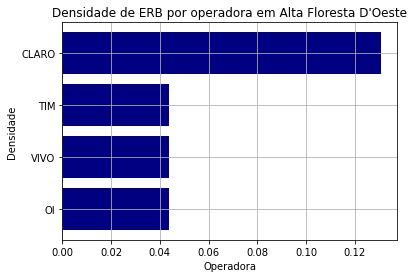

<Figure size 720x576 with 0 Axes>

In [ ]:
# Geração do Gráfico da densidade de ERB por operadora no município
%matplotlib inline
plt.rcParams.update({'font.size': 10})
mun = Tabela['Município'].unique()
for c in mun :
    if c == "Alta Floresta D'Oeste":
        teste = Tabela_vis.loc[Tabela_vis['Município'] == c]
        teste = teste.sort_values(by=['DENSIDADE'])
        ax = plt.subplot()
        ax1 = ax.barh(teste['OPERADORA'],teste['DENSIDADE'],color='navy')
        plt.title(f'Densidade de ERB por operadora em {c}',loc='center')
        plt.yticks(fontsize=10)
        plt.xlabel('Operadora')
        plt.ylabel('Densidade')
        plt.grid(True)
        plt.figure(figsize = (10,8))
        plt.show()

# Gráficos - Densidade , Qtd de Erbs , Capacidade

In [ ]:
# Visualização da densidade de erbs por UF
erb_ope_Uf = erb_mun_ope.groupby(['UF','Operadora'])['ERB'].sum().reset_index()
erb_ope_Uf = erb_ope_Uf.fillna(0)
pop_Uf = ibge.groupby(['UF'])['POPULAÇÃO ESTIMADA'].sum().reset_index()
erb_Uf = pop_Uf.merge(erb_ope_Uf,left_on='UF', right_on='UF')
erb_Uf['DEN_ERB_UF'] = erb_Uf['ERB'] / erb_Uf['POPULAÇÃO ESTIMADA']*1000
erb_Uf.loc[erb_Uf['UF'] == 'SP']

,UF,POPULAÇÃO ESTIMADA,Operadora,ERB,DEN_ERB_UF
100,SP,45919049,CLARO,4915,0.11
101,SP,45919049,OI,5123,0.11
102,SP,45919049,TIM,5459,0.12
103,SP,45919049,VIVO,5982,0.13


In [ ]:
# Agrupando apenas o valor total das densidades por UF
erb_uf = erb_Uf.groupby('UF')['DEN_ERB_UF'].sum().sort_values(ascending=True)
erb_uf = erb_uf.to_frame()
erb_uf.reset_index(inplace=True)

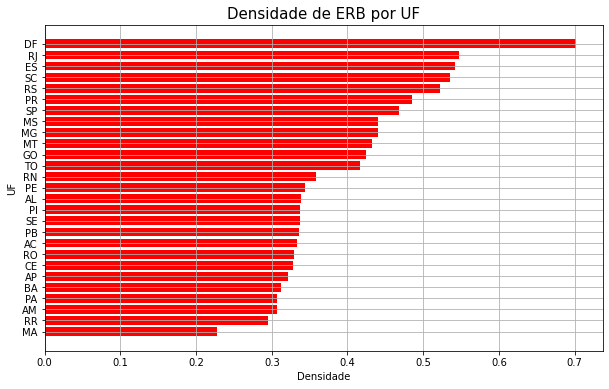

In [ ]:
#Gráfico da Densidade por ERB
x1 = erb_uf['DEN_ERB_UF']
y1 = erb_uf['UF']

plt.figure(figsize=(10,6))
plt.barh(y1,x1,align='center',color='r')
plt.title('Densidade de ERB por UF',fontsize=15,loc='center')
plt.xlabel("Densidade")
plt.ylabel('UF')
plt.grid(True)
plt.show()

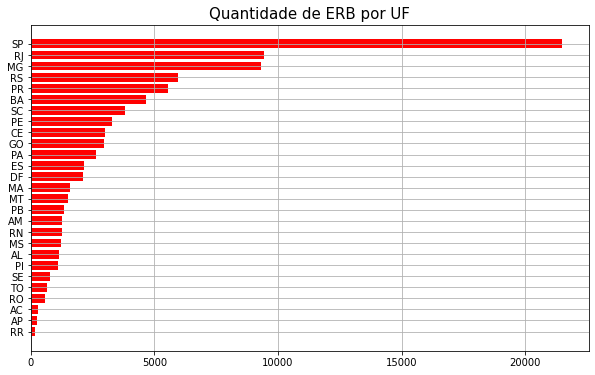

In [ ]:
# Demonstração da quantidade de erb's por UF
%matplotlib inline

#Gráfico de barras
erb_UF_qtds = erb_Uf.groupby('UF')['ERB'].sum().sort_values(ascending=True)
erb_UF_qtds = erb_UF_qtds.to_frame()
erb_UF_qtds.reset_index(inplace=True)

x2 = erb_UF_qtds['ERB']
y2 = erb_UF_qtds['UF']


plt.figure(figsize = (10,6))
plt.barh(y2,x2,align='center',color='r')
plt.title('Quantidade de ERB por UF',fontsize=15,loc='center')
plt.grid(True)
plt.show()

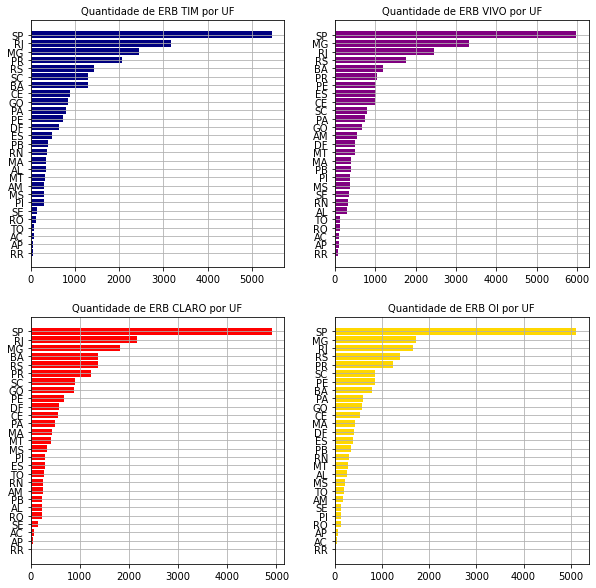

In [ ]:
# Demonstração da quantidade de erb's por UF e operadora
%matplotlib inline

# Agrupando a quantidade de erbs por operadora
erb_UFO_qtds = pd.DataFrame(erb_Uf.groupby(['UF','Operadora'])['ERB'].sum().sort_values(ascending=True)).reset_index()
erb_UFT_qtds = erb_UFO_qtds.loc[erb_UFO_qtds['Operadora'] == "TIM"]
erb_UFV_qtds = erb_UFO_qtds.loc[erb_UFO_qtds['Operadora'] == "VIVO"]
erb_UFC_qtds = erb_UFO_qtds.loc[erb_UFO_qtds['Operadora'] == "CLARO"]
erb_UFO_qtds = erb_UFO_qtds.loc[erb_UFO_qtds['Operadora'] == "OI"]

x2 = erb_UFT_qtds['ERB']
x3 = erb_UFV_qtds['ERB']
x4 = erb_UFC_qtds['ERB']
x5 = erb_UFO_qtds['ERB']

fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0, 0].barh(erb_UFT_qtds['UF'], x2,align='center',color='navy')
axs[0, 0].set_title('Quantidade de ERB TIM por UF',fontsize=10)
axs[0,0].grid(True)
axs[0, 1].barh(erb_UFV_qtds['UF'], x3,align='center',color='purple')
axs[0, 1].set_title('Quantidade de ERB VIVO por UF',fontsize=10)
axs[0,1].grid(True)
axs[1, 0].barh(erb_UFC_qtds['UF'], x4, align='center',color='red')
axs[1, 0].set_title('Quantidade de ERB CLARO por UF',fontsize=10)
axs[1,0].grid(True)
axs[1, 1].barh(erb_UFO_qtds['UF'], x5, align='center',color='gold')
axs[1, 1].set_title('Quantidade de ERB OI por UF',fontsize=10)
axs[1,1].grid(True)

plt.show()

In [ ]:
# Visualização do total de Capacidade por UF
mosaico_qtd = mosaico_vis.groupby(['UF'])['TOTAL_CAPACIDADE'].sum().sort_values(ascending=True)
mosaico_qtd = mosaico_qtd.to_frame()
mosaico_qtd.reset_index(inplace=True)
mosaico_qtd.head()

,UF,TOTAL_CAPACIDADE
0,RR,9818.50
1,AC,14898.00
2,AP,14912.50
3,RO,31139.00
4,TO,31368.50


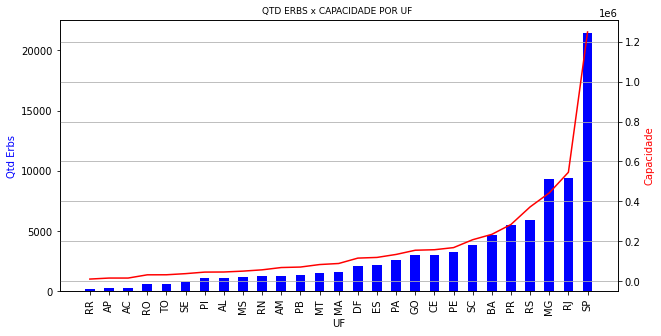

In [ ]:
# Gráfico com total de capacidade por UF e qtd de erbs
fig, ax1 = plt.subplots(figsize=(10,5))

UF = [UF for UF in erb_UF_qtds['UF'].values]


ax2 = ax1.twinx()
ax1.bar(UF,erb_UF_qtds['ERB'],color='blue',width=0.5)
ax2.plot(UF,mosaico_qtd['TOTAL_CAPACIDADE'],color='red')
ax1.set_xticklabels(UF,rotation='vertical',size=10)
plt.title('QTD ERBS x CAPACIDADE POR UF ',size=(9),loc='center')
ax1.set_xlabel('UF')
ax1.set_ylabel('Qtd Erbs', color='blue')
ax2.set_ylabel('Capacidade', color='red')
plt.grid(True)
plt.show()

In [ ]:
# Agregando as informações de total de capacidade e densidade por UF
cap_den = pd.merge(erb_uf,mosaico_qtd,how='left',on='UF').sort_values(by=['DEN_ERB_UF'],ascending=False)
cap_den.tail()

,UF,DEN_ERB_UF,TOTAL_CAPACIDADE
4,BA,0.31,234189.50
3,PA,0.31,167638.50
2,AM,0.31,70137.50
1,RR,0.30,9818.50
0,MA,0.23,88001.00


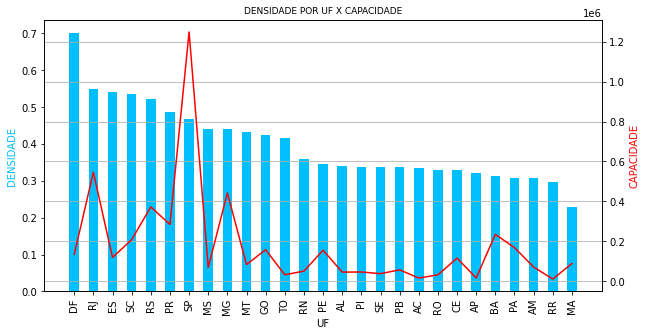

In [ ]:
# Gráfico com total de capacidade e densidade por UF
fig, ax1 = plt.subplots(figsize=(10,5))

UF = [UF for UF in cap_den['UF'].values]

ax2 = ax1.twinx()
ax1.bar(UF,cap_den['DEN_ERB_UF'],color='deepskyblue',width=0.5)
ax2.plot(UF,cap_den['TOTAL_CAPACIDADE'],color='red')
ax1.set_xticklabels(UF,rotation='vertical',size=10)
plt.title('DENSIDADE POR UF X CAPACIDADE',size=(9),loc='center')
ax1.set_xlabel('UF')
ax1.set_ylabel('DENSIDADE', color='deepskyblue')
ax2.set_ylabel('CAPACIDADE', color='red')
plt.grid(True)
plt.show()

In [ ]:
# Agregando a informação do GAP TIM  com a qtd de erbs
gap_erb = erb_Uf.groupby(['Operadora','UF'])['ERB'].sum()
gap_erb = gap_erb.to_frame()
gap_erb.reset_index(inplace=True)
gap_erb = gap_erb.loc[gap_erb['Operadora'] == 'TIM']

In [ ]:
# Obtendo a informação do total de GAP TIM por uf
gap_tim = erb_vis.groupby(['UF'])['GAP_TIM'].sum()
gap_tim = gap_tim.to_frame()
gap_tim.reset_index(inplace=True)

gap_tim.head()

,UF,GAP_TIM
0,AC,25.00
1,AL,77.00
2,AM,55.00
3,AP,19.00
4,BA,436.00


In [ ]:
# Agregando os dois dataframes
gap_tim_erb = pd.merge(gap_erb,gap_tim,how='left',on='UF')
gap_tim_erb = gap_tim_erb.groupby('UF')['ERB','GAP_TIM'].sum().sort_values(by=['ERB'],ascending=False)
gap_tim_erb.reset_index(inplace=True)
gap_tim_erb.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,UF,ERB,GAP_TIM
0,SP,5459,989.00
1,RJ,3172,32.00
2,MG,2443,680.00
3,PR,2067,74.00
4,RS,1427,357.00


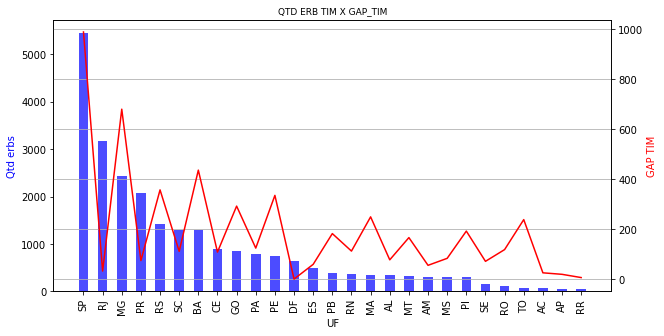

In [ ]:
# Gerando a visualização do GAP TIM por UF e qtd de erb 
fig, ax1 = plt.subplots(figsize=(10,5))

UF = [UF for UF in gap_tim_erb['UF'].values]

ax2 = ax1.twinx()
ax1.bar(UF,gap_tim_erb['ERB'],color='blue',width=0.5,alpha=0.7)
ax2.plot(UF,gap_tim_erb['GAP_TIM'],color='red')
ax1.set_xticklabels(UF,rotation='vertical',size=10)
plt.title('QTD ERB TIM X GAP_TIM',size=(9),loc='center')
ax1.set_xlabel('UF')
ax1.set_ylabel('Qtd erbs', color='blue')
ax2.set_ylabel('GAP TIM', color='red')
plt.grid(True)
plt.show()

# Visualização da Posição TIM em relação ao MKTS

In [ ]:
# Realizando um slice do df Tabela
Tabela_vis_mkt = Tabela[['CodMunicipio','Município','UF','TIM_MKTS','VIVO_MKTS','CLARO_MKTS','OI_MKTS']]
Tabela_vis_mkt = pd.melt(Tabela_vis_mkt,id_vars=['Município','CodMunicipio','UF'],var_name='OPERADORA',value_name='MKT_SHARE')

In [ ]:
# Acrescentando a coluna da Posição
Tabela_vis_mkt['POSIÇÃO']= Tabela_vis_mkt.groupby('Município').MKT_SHARE.rank(method='dense',ascending=False)
Tabela_vis_mkt.head()

,Município,CodMunicipio,UF,OPERADORA,MKT_SHARE,POSIÇÃO
0,Abadia de Goiás,5200050,GO,TIM_MKTS,16.62,3.00
1,Abadia dos Dourados,3100104,MG,TIM_MKTS,7.18,3.00
2,Abadiânia,5200100,GO,TIM_MKTS,20.78,3.00
3,Abaetetuba,1500107,PA,TIM_MKTS,29.18,2.00
4,Abaeté,3100203,MG,TIM_MKTS,9.47,2.00


In [ ]:
# Passando os valores das posições como valores das operadoras
Tabela_pos_mkt = pd.pivot_table(Tabela_vis_mkt,'POSIÇÃO',['CodMunicipio','Município','UF'],'OPERADORA')
Tabela_pos_mkt.fillna(0,inplace=True)
# Renomeando as colunas
Tabela_pos_mkt.rename(columns={'CLARO_MKTS':'CLARO_MKTS_POS','OI_MKTS':'OI_MKTS_POS','TIM_MKTS':'TIM_MKTS_POS','VIVO_MKTS':'VIVO_MKTS_POS'},inplace=True)
Tabela_pos_mkt.reset_index(inplace=True)
Tabela_pos_mkt.head()

OPERADORA,CodMunicipio,Município,UF,CLARO_MKTS_POS,OI_MKTS_POS,TIM_MKTS_POS,VIVO_MKTS_POS
0,1100015,Alta Floresta D'Oeste,RO,3.00,2.00,4.00,1.00
1,1100023,Ariquemes,RO,1.00,3.00,4.00,2.00
2,1100031,Cabixi,RO,2.00,3.00,1.00,4.00
3,1100049,Cacoal,RO,1.00,3.00,4.00,2.00
4,1100056,Cerejeiras,RO,1.00,2.00,4.00,3.00


# Resumo das informações obtidas



## 1 - Qtd de erb's de cada operadora por município
## 2 - Qtd de GAP TIM em relação a erb por município e UF
## 3 - MKTS das operadoras por município baseada nas informações de acesso de telefonia móvel de 2020
## 4 - Qtd de banda e capacidade por erb de cada operadora por município
## 5 - Total da Densidade em relação a erb de cada operadora por município e UF
## 6 - Total da Densidade de erb por UF

# Lista dos principais df's com seus respectivos conteúdos

## 1 - acessos_ope_mun - contém a informação de acesso , mkts de cada operadora por município
## 2 - mosaico - contém um slice da planilha mosaico_base com informações de banda agregada a tecnologia e sua capacidade por erb
## 3 - mosaico_vis - contém a informação do total de frequências por erb e sua capacidade. Como também, as frequências estão agregadas com sua tecnologia como colunas do df
## 4 - erb_vis - contém as informações da quantidade de erbs por operadora , porcentagem da qtd de erbs em relação ao total de erbs por operadora e município, gap tim erb em relação a maior quantidade de erbs da primeira operadora colocada por município , ranking das operadoras em relação a sua quantidade de erbs por município
## 5 - Tabela - contém as informações do total de acessos, mkts, densidade em relação a erb e quantidade de erb por operadora e município
## 6 - erb_Uf - df que contém a população estimada , operadora , quantidade total de erbs e densidade por município. A partir dela, geramos várias visualizações 
## 7 - Tabela_pos_mkt - contém a informação da posição das operadoras em relação aos seus respectivos mkts